### Assignment 1

Clean Data
Exploratory Analaysis (Basic Analysis)
Pattern Recognition
Analytic Visualisation

Machine Learning
Algorithm Optimisation

Statistical Inference
Predictions 
Information Presentation


## Initialise Libraries and Data

In [55]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [56]:
data = pd.read_csv('anime_cleaned.csv')
numeric_data = pd.DataFrame(data[["score", "scored_by_users", "episodes", "year aired", "duration"]])
data.head()

,Unnamed: 0,Unnamed: 0.1,rank,title,score,scored_by_users,type,episodes,status,year aired,...,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
0,0,0,1,Fullmetal Alchemist: Brotherhood,9.15,1704441,TV,64.0,Finished Airing,2009,...,Bones,Manga,"Action, Adventure, Comedy, Drama, Fantasy",Action,Military,Shounen,24,R - 17+ (violence & profanity),3,https://myanimelist.net/anime/5114/Fullmetal_A...
1,1,1,2,Shingeki no Kyojin: The Final Season Part 2,9.12,188373,TV,12.0,Currently Airing,2022,...,MAPPA,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),198,https://myanimelist.net/anime/48583/Shingeki_n...
2,2,2,3,Steins;Gate,9.09,1161139,TV,24.0,Finished Airing,2011,...,White Fox,Visual novel,"Drama, Sci-Fi, Suspense",Drama,Psychological,All,24,PG-13 - Teens 13 or older,13,https://myanimelist.net/anime/9253/Steins_Gate
3,3,3,4,Gintama°,9.09,182120,TV,51.0,Finished Airing,2015,...,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,334,https://myanimelist.net/anime/28977/Gintama°
4,4,4,5,Shingeki no Kyojin Season 3 Part 2,9.08,1195629,TV,10.0,Finished Airing,2019,...,Wit Studio,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),32,https://myanimelist.net/anime/38524/Shingeki_n...


## Basic Analysis

In [57]:
data.info() #info on all columns
data.shape #gets total column/rows
data.describe().round(3) #mean/median/count/etc for all numeric data types
print(data.dtypes) #get all column name and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958 entries, 0 to 3957
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3958 non-null   int64  
 1   Unnamed: 0.1     3958 non-null   int64  
 2   rank             3958 non-null   int64  
 3   title            3958 non-null   object 
 4   score            3958 non-null   float64
 5   scored_by_users  3958 non-null   int64  
 6   type             3958 non-null   object 
 7   episodes         3942 non-null   float64
 8   status           3958 non-null   object 
 9   year aired       3958 non-null   int64  
 10  premiered        3958 non-null   object 
 11  broadcast        3958 non-null   object 
 12  producers        3958 non-null   object 
 13  licensors        3958 non-null   object 
 14  studios          3958 non-null   object 
 15  source           3958 non-null   object 
 16  genres           3284 non-null   object 
 17  main genre    

## All Display Functions

In [111]:
#get count of all different unique values in one column
def getCountOfColumn(columnname):
    print("Number of " +columnname + ":", len(data[columnname].unique()))

    print(data[columnname].value_counts())
    sb.catplot(y = columnname, data = data, kind = "count", height = 4)

#compare two colums with heatmap
def compareTwoColumnsHeatMap(column1, column2):
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(data.groupby([column1, column2]).size().unstack(), 
               linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", fmt='g')
    
#get graph for numeric data    
def getNumericGraphs():
    f, axes = plt.subplots(5, 3, figsize=(18, 24))

    count = 0
    for var in numeric_data:
        sb.boxplot(data = data[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = data[var], ax = axes[count,1])
        sb.violinplot(data = data[var], orient = "h", ax = axes[count,2])
        count += 1
        
def getCorrMatrix():
    # Correlation Matrix
    print(numeric_data.corr())

    # Heatmap of the Correlation Matrix
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Number of main genre: 17
Action           1322
Comedy           1005
Unknown           674
Adventure         467
Drama             287
Fantasy            48
Mystery            35
Boys Love          28
Horror             23
Romance            19
Avant Garde        12
Slice of Life      12
Sci-Fi             11
Gourmet             9
Girls Love          4
Sports              1
Supernatural        1
Name: main genre, dtype: int64


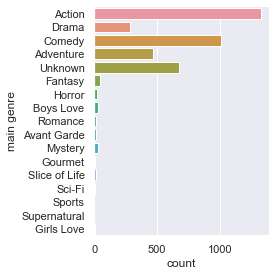

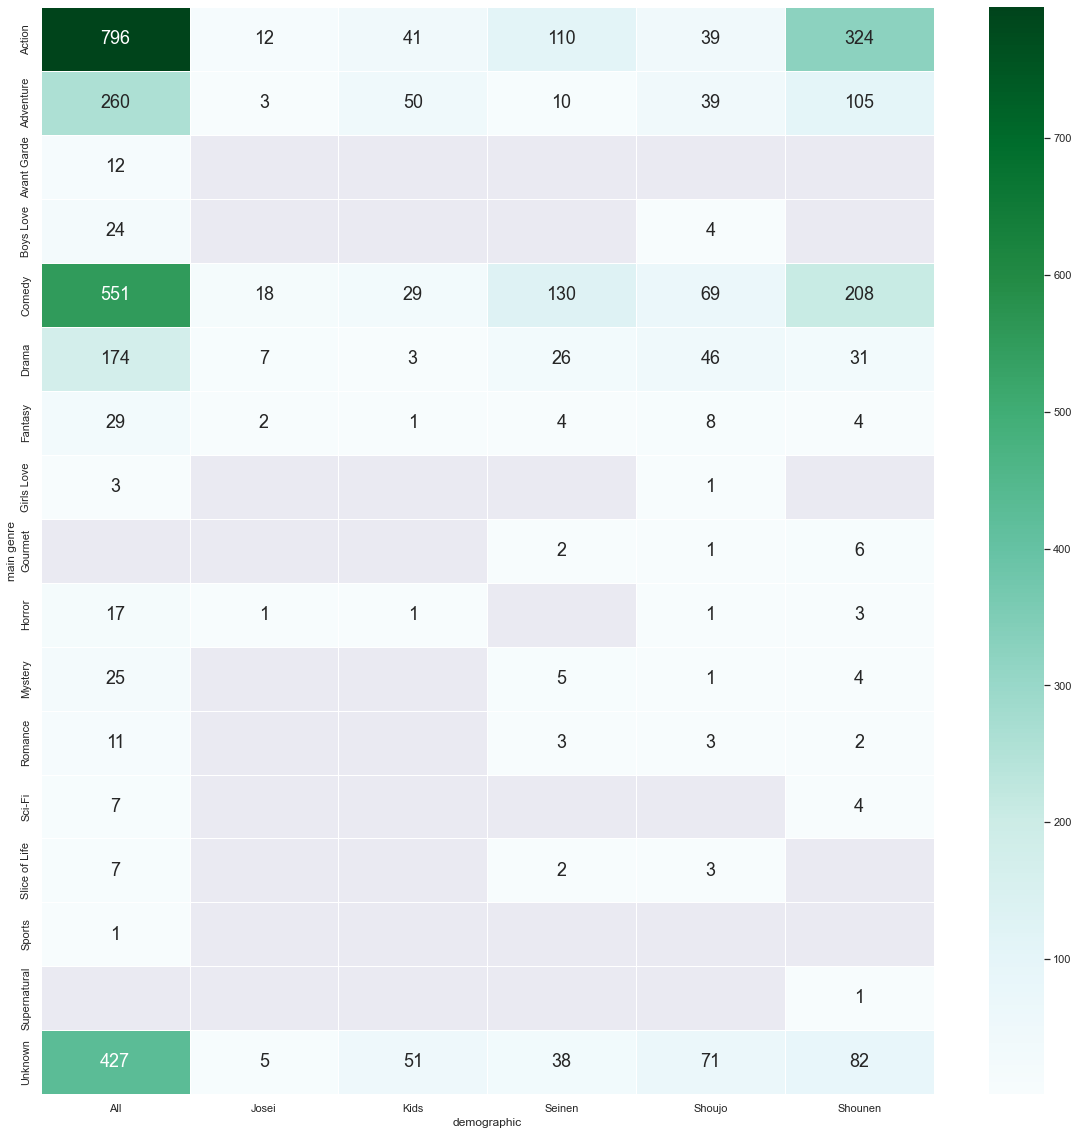

In [109]:
getCountOfColumn("main genre")
compareTwoColumnsHeatMap("main genre", "demographic")

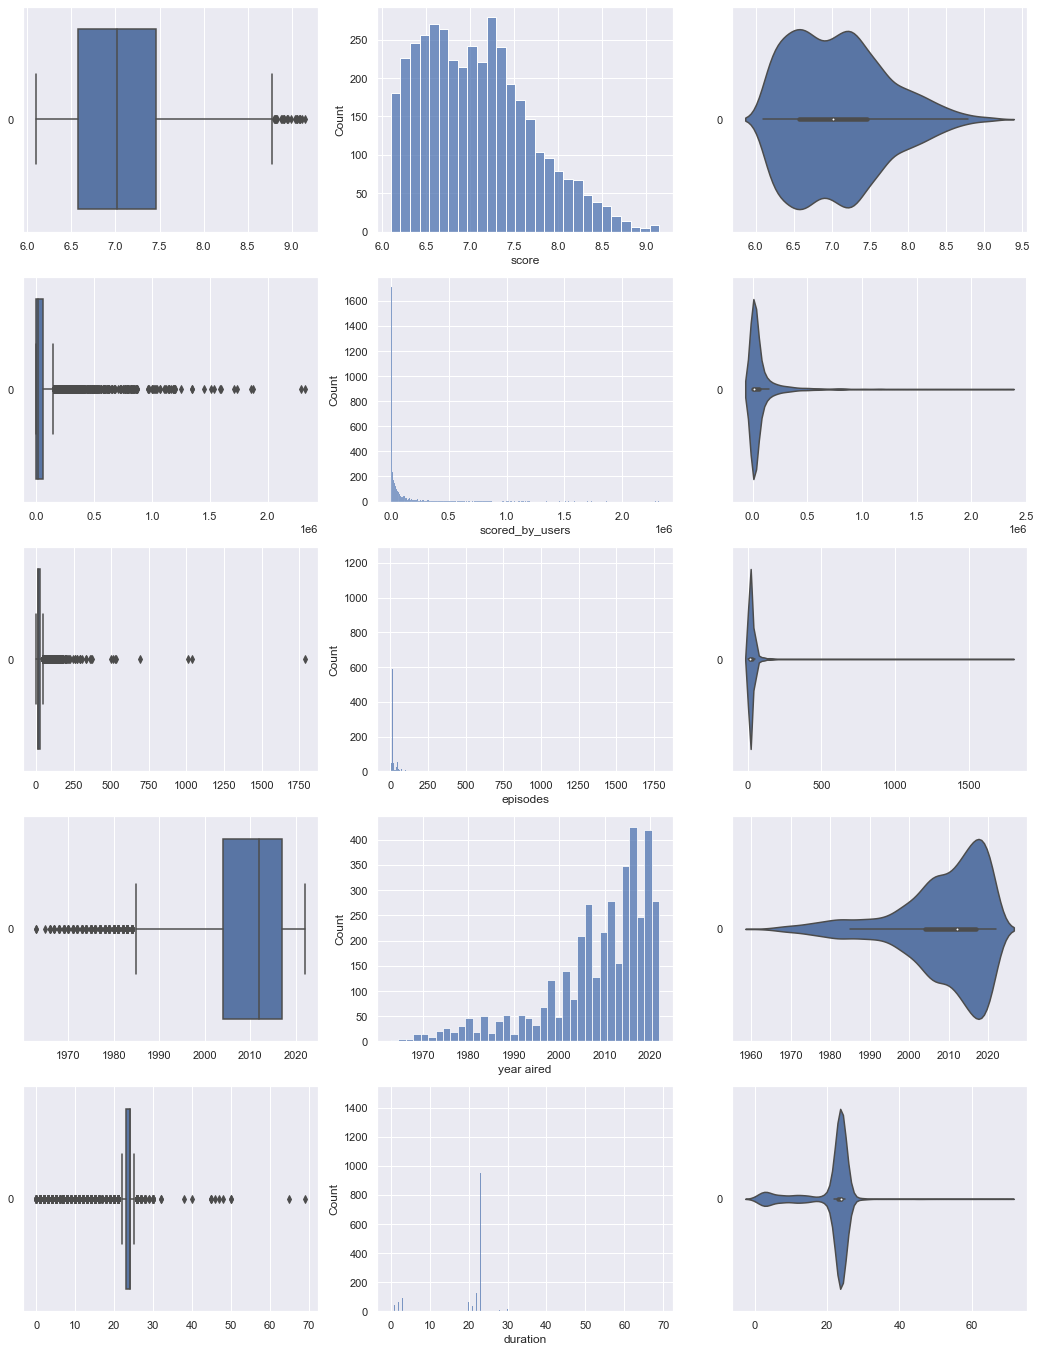

In [112]:
getNumericGraphs()

                    score  scored_by_users  episodes  year aired  duration
score            1.000000         0.440870  0.028308    0.163512  0.222995
scored_by_users  0.440870         1.000000  0.020218    0.158500  0.138948
episodes         0.028308         0.020218  1.000000   -0.271113  0.007077
year aired       0.163512         0.158500 -0.271113    1.000000 -0.245381
duration         0.222995         0.138948  0.007077   -0.245381  1.000000


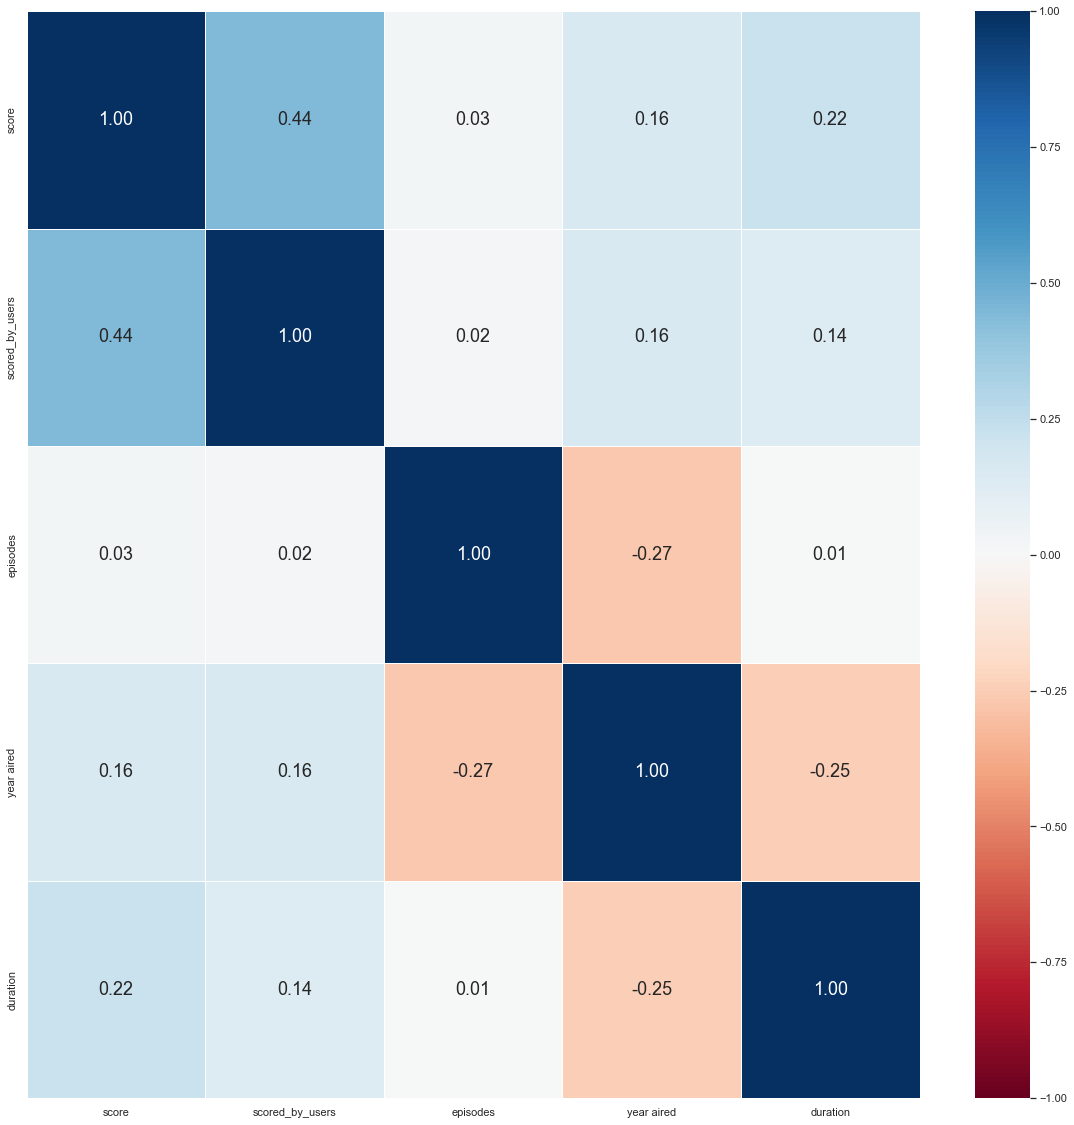

In [94]:
getCorrMatrix()

### Top 10 Animes by Score

In [121]:
data.sort_values('score', ascending=False).head(10).iloc[:,3:]

,title,score,scored_by_users,type,episodes,status,year aired,premiered,broadcast,producers,...,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
0,Fullmetal Alchemist: Brotherhood,9.15,1704441,TV,64.0,Finished Airing,2009,Spring,Sundays,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",...,Bones,Manga,"Action, Adventure, Comedy, Drama, Fantasy",Action,Military,Shounen,24,R - 17+ (violence & profanity),3,https://myanimelist.net/anime/5114/Fullmetal_A...
1,Shingeki no Kyojin: The Final Season Part 2,9.12,188373,TV,12.0,Currently Airing,2022,Winter,Mondays,"Production I.G, Dentsu, Mainichi Broadcasting ...",...,MAPPA,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),198,https://myanimelist.net/anime/48583/Shingeki_n...
2,Steins;Gate,9.09,1161139,TV,24.0,Finished Airing,2011,Spring,Wednesdays,"Frontier Works, Media Factory, Movic, AT-X, Ka...",...,White Fox,Visual novel,"Drama, Sci-Fi, Suspense",Drama,Psychological,All,24,PG-13 - Teens 13 or older,13,https://myanimelist.net/anime/9253/Steins_Gate
3,Gintama°,9.09,182120,TV,51.0,Finished Airing,2015,Spring,Wednesdays,"TV Tokyo, Aniplex, Dentsu",...,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,334,https://myanimelist.net/anime/28977/Gintama°
4,Shingeki no Kyojin Season 3 Part 2,9.08,1195629,TV,10.0,Finished Airing,2019,Spring,Mondays,"Production I.G, Dentsu, Mainichi Broadcasting ...",...,Wit Studio,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),32,https://myanimelist.net/anime/38524/Shingeki_n...
5,Fruits Basket: The Final,9.06,128247,TV,13.0,Finished Airing,2021,Spring,Tuesdays,"TV Tokyo, TV Osaka, Nihon Ad Systems, Hakusens...",...,TMS Entertainment,Manga,"Drama, Romance, Slice of Life, Supernatural",Drama,Unknown,Shoujo,23,PG-13 - Teens 13 or older,629,https://myanimelist.net/anime/42938/Fruits_Bas...
6,Gintama',9.06,188495,TV,51.0,Finished Airing,2011,Spring,Mondays,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",...,Sunrise,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,379,https://myanimelist.net/anime/9969/Gintama
7,Hunter x Hunter (2011),9.05,1343292,TV,148.0,Finished Airing,2011,Fall,Sundays,"VAP, Nippon Television Network, Shueisha",...,Madhouse,Manga,"Action, Adventure, Fantasy",Action,Super Power,Shounen,23,PG-13 - Teens 13 or older,9,https://myanimelist.net/anime/11061/Hunter_x_H...
8,Gintama': Enchousen,9.04,137219,TV,13.0,Finished Airing,2012,Fall,Thursdays,"TV Tokyo, Aniplex, Dentsu, Shueisha, Miracle Bus",...,Sunrise,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,684,https://myanimelist.net/anime/15417/Gintama__E...
9,Gintama.,8.99,115784,TV,12.0,Finished Airing,2017,Winter,Mondays,"TV Tokyo, Aniplex, Dentsu, Shueisha",...,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,731,https://myanimelist.net/anime/34096/Gintama


### Top 10 Worst Anime by Score

In [122]:
data.sort_values('score', ascending=True).head(10).iloc[:,3:]

,title,score,scored_by_users,type,episodes,status,year aired,premiered,broadcast,producers,...,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
3887,Ganbare Goemon,6.10,319,TV,23.0,Finished Airing,1997,Fall,Saturdays,Konami,...,Trans Arts,Game,NaN,Unknown,Unknown,Shounen,24,G - All Ages,10654,https://myanimelist.net/anime/2885/Ganbare_Goemon
3886,Fight League: Gear Gadget Generators,6.10,817,ONA,26.0,Finished Airing,2019,Unknown,Unknown,Magic Capsule,...,"Sunrise, Bandai Namco Pictures, XFLAG",Game,"Action, Sci-Fi",Action,Mecha,All,10,PG-13 - Teens 13 or older,8042,https://myanimelist.net/anime/38719/Fight_Leag...
3885,Chinpui,6.10,417,TV,56.0,Finished Airing,1989,Winter,Unknown,Kyoto Animation,...,"Production I.G, Shin-Ei Animation",Manga,NaN,Unknown,Unknown,All,25,G - All Ages,11057,https://myanimelist.net/anime/5908/Chinpui
3884,BlazBlue: Alter Memory,6.10,33517,TV,12.0,Finished Airing,2013,Fall,Wednesdays,"Lantis, Studio Mausu",...,"Hoods Entertainment, teamKG",Game,"Action, Fantasy",Action,Unknown,All,24,R - 17+ (violence & profanity),1899,https://myanimelist.net/anime/18767/BlazBlue__...
3883,Arad: Suming Zhi Men,6.10,167,ONA,20.0,Finished Airing,2017,Unknown,Unknown,"Tohokushinsha Film Corporation, Tencent Animat...",...,"Success Corp., Dangun Pictures",Game,"Action, Adventure, Fantasy",Action,Unknown,All,14,PG-13 - Teens 13 or older,10149,https://myanimelist.net/anime/38413/Arad__Sumi...
3882,21 Emon,6.10,208,TV,39.0,Finished Airing,1991,Spring,Unknown,"None found, add some",...,Shin-Ei Animation,Unknown,"Comedy, Sci-Fi",Comedy,Space,All,25,G - All Ages,11885,https://myanimelist.net/anime/5628/21_Emon
3881,11eyes,6.10,116354,TV,12.0,Finished Airing,2009,Fall,Wednesdays,"Marvelous, Pony Canyon, feng",...,Doga Kobo,Visual novel,"Action, Supernatural, Ecchi",Action,Super Power,All,25,R - 17+ (violence & profanity),845,https://myanimelist.net/anime/6682/11eyes
3864,Saru Getchu: On Air,6.11,270,TV,26.0,Finished Airing,2006,Spring,Unknown,"None found, add some",...,Xebec,Game,"Adventure, Comedy, Fantasy, Romance",Adventure,Unknown,All,15,PG - Children,11089,https://myanimelist.net/anime/1872/Saru_Getchu...
3865,Seupideuwang Beongae,6.11,187,TV,26.0,Finished Airing,1998,Spring,Unknown,"None found, add some",...,"None found, add some",Unknown,"Action, Sports",Action,Unknown,Shounen,24,None,12764,https://myanimelist.net/anime/9424/Seupideuwan...
3866,Shichisei no Subaru,6.11,42937,TV,12.0,Finished Airing,2018,Summer,Fridays,"TBS, SUPA LOVE",...,Lerche,Light novel,"Action, Fantasy, Sci-Fi",Action,Game,All,24,PG-13 - Teens 13 or older,1469,https://myanimelist.net/anime/36316/Shichisei_...


### can maybe do top 10 animes per season / year?